<a href="https://colab.research.google.com/github/arun-arunisto/OpenCVTutorialAbel/blob/main/PoseDetectionUsingOPENCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the modules and packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#use the model and prototext file
protofile = "/content/drive/MyDrive/AbelFolder/post_detection_model/pose_deploy_linevec_faster_4_stages.prototxt"
weightfile = "/content/drive/MyDrive/AbelFolder/post_detection_model/pose_iter_160000.caffemodel"

In [5]:
npoints = 15
POSE_PAIRS = [
    [0, 1],
    [1, 2],
    [2, 3],
    [3, 4],
    [1, 5],
    [5, 6],
    [6, 7],
    [1, 14],
    [14, 8],
    [8, 9],
    [9, 10],
    [14, 11],
    [11, 12],
    [12, 13],
]

net = cv2.dnn.readNetFromCaffe(protofile, weightfile)

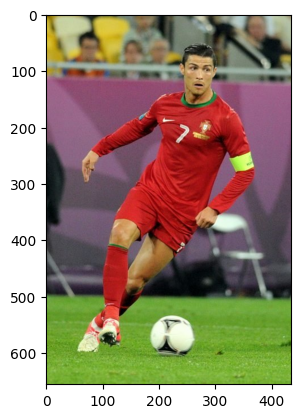

In [6]:
image_file = cv2.imread("/content/drive/MyDrive/AbelFolder/post_detection_model/Cristiano_Ronaldo_20120609.jpg")
plt.imshow(image_file[:, :, ::-1])

In [7]:
netinputsize = (300, 300)
inpblob = cv2.dnn.blobFromImage(image_file, 1.0/255, netinputsize, (0, 0, 0), swapRB=False, crop=False)
net.setInput(inpblob)

In [8]:
output = net.forward()

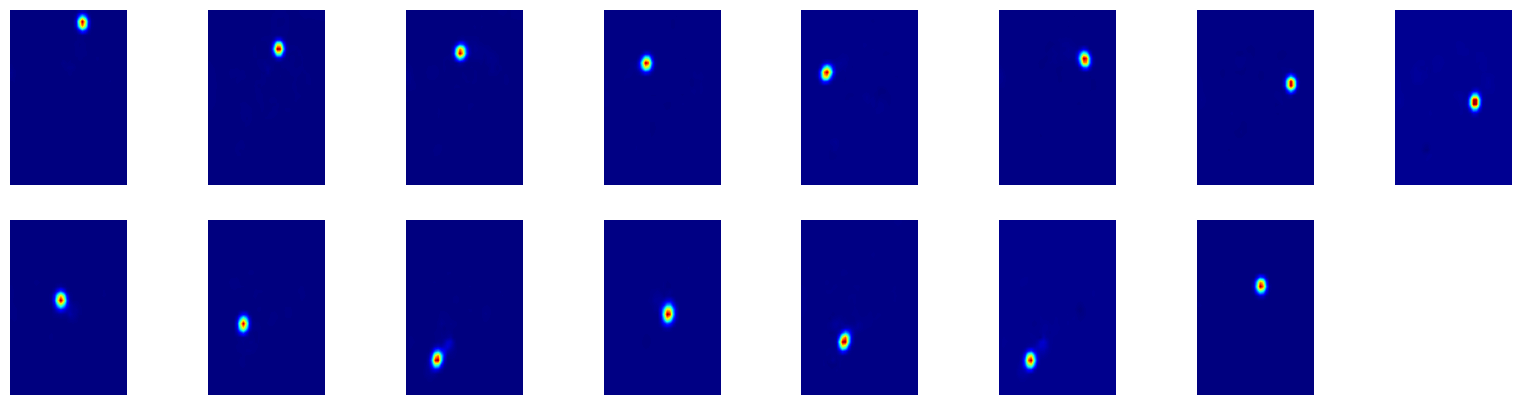

In [12]:
#displaying the probability maps
plt.figure(figsize=(20, 5))
for i in range(npoints):
  probmap = output[0, i, :, :]
  displaymap = cv2.resize(probmap, (image_file.shape[1], image_file.shape[0]), cv2.INTER_LINEAR)

  plt.subplot(2, 8, i+1)
  plt.axis("off")
  plt.imshow(displaymap, cmap="jet")

In [13]:
#extracting the points from image
scaleX = image_file.shape[1]/output.shape[3]
scaley = image_file.shape[0]/output.shape[2]

points = [] # to store the detected points


In [14]:
threshold = 0.1

In [16]:
for i in range(npoints):
  #obtain the probabilt
  probmap = output[0, i, :, :]

  #obtaining the global probability map value
  minVal, prob, minloc, point = cv2.minMaxLoc(probmap)

  #scale the point to fit in original image
  x = scaleX*point[0]
  y = scaley*point[1]

  if prob > threshold:
    points.append((int(x), int(y)))
  else:
    points.append(None)

In [17]:
points

[(263, 34),
 (251, 138),
 (194, 155),
 (148, 189),
 (91, 224),
 (309, 172),
 (343, 276),
 (286, 345),
 (183, 293),
 (125, 379),
 (114, 517),
 (228, 345),
 (160, 448),
 (114, 517),
 (228, 241)]

In [18]:
#two images
#first one for dots
dotimage = image_file.copy()
#second one for skelton
skeltonimage = image_file.copy()

In [21]:
#drawing points
for i, p in enumerate(points):
  cv2.circle(dotimage, p, 8, (255, 0, 0), thickness=-1, lineType=cv2.FILLED)
  cv2.putText(dotimage, "{}".format(i), p, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)

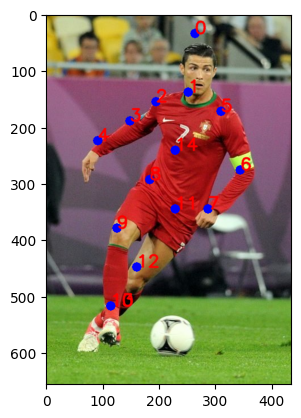

In [22]:
plt.imshow(dotimage[:, :, ::-1])

In [26]:
#drawing skelton
for pair in POSE_PAIRS:
  partA = pair[0]
  partB = pair[1]

  if points[partA] and points[partB]:
    cv2.line(skeltonimage, points[partA], points[partB], (0, 255, 0), 2)
    cv2.circle(skeltonimage, points[partA], 8, (255, 0, 0), thickness=-1, lineType=cv2.FILLED)

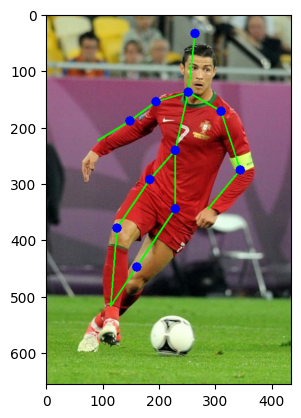

In [27]:
plt.imshow(skeltonimage[:, :, ::-1])